# La propagation d'une onde

##  Spécialité Physique Chimie de première

### Ludovic Gaudichet, lycée René Cassin, Noisiel

###

Capacités numériques : Représenter un signal périodique et illustrer l’influence de ses caractéristiques (période, amplitude) sur sa représentation. Simuler à l’aide d’un langage de programmation, la propagation d’une onde périodique.

 Capacité mathématique : Utiliser les représentations graphiques des fonctions sinus et cosinus.

### Exécuter ligne par ligne : >| ; Redémarrer et exécuter l'ensemble : >>

In [1]:
%matplotlib inline

from math import *
from matplotlib import pyplot

### Quelques paramètres du système
C'est une corde tendue horizontalement.

In [2]:
L = 20             # (m) longueur de la corde
celerite = 8       # (m.s-1)
duree = L/celerite # (s)
# |-> temps mis par l'onde pour parcourir toute la corde

### Définition de la perturbation
grâce à une fonction (du temps) qui donne l'amplitude à un certain temps. Dans le cas d'une corde tendue horizontalement, l'amplitude est en fait la hauteur d'un point de la corde.

On va faire simple pour commencer, en imaginant qu'au début, l'extrémité de départ de la corde monte à 1 m, puis ce point descend progressivement à 0 m en 0,1 seconde. La fonction peut s'écrire ainsi :

In [3]:
def Perturbation(temps):
    # à la position (0,0)
    # temps en seconde
    # amplitude en mètre

    amplitude = 0
    if temps>=0 and temps<=0.1 :
        amplitude = 1-temps*10
    return amplitude

### Représentation temporelle de l'onde
Comment évolue l'amplitude au point de départ de l'onde (x=0) ? Il s'agit simplement de tracer le graphe en fonction du temps de la fonction précédente.

D'abord on créé une liste de coordonnées temporelles, puis les amplitudes correspondantes :

In [4]:
Np = 200 # nbre de points
dt = duree/Np
list_t = [] # temps
list_a = [] # amplitude

for i in range (0,Np-1):
    temps = i*dt
    list_t.append(temps)
    list_a.append( Perturbation(temps) )

Puis on trace le graphe :

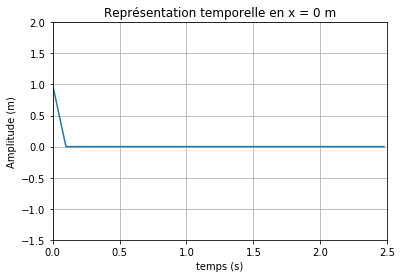

In [5]:
pyplot.close()
#fig, ax = pyplot.subplots(1,1,figsize=(6,7))
fig, ax = pyplot.subplots(1,1)
ax.grid(True)
ax.axis([0,duree, -1.5, 2])
ax.set_xlabel('temps (s)')
ax.set_ylabel('Amplitude (m)')
ax.set_title("Représentation temporelle en x = 0 m")
ax.plot(list_t, list_a)

### Représentation temporelle en un autre point

Comment peut-on montrer l'amplitude de la corde en n'importe quel autre point de la corde, en fonction du temps ?
On peut considérer qu'en ce point, la perturbation sera la même, mais avec un certain retard, dû au temps de propagation.
Il suffit donc d'introduire ce retard quand on utilise la fonction Perturbation() (qui reste la même donc).

In [6]:
mon_x = 5.3 # à x m du point de départ de la perturbation
retard = mon_x/celerite

for i in range (0,Np-1):
    temps = i*dt
    list_t[i] = temps
    list_a[i] = Perturbation(temps-retard)

Remarque : Les listes sont déjà créées, on les réutilise.

Ensuite on trace le graphe :

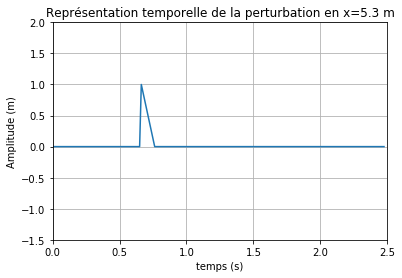

In [7]:
fig, ax = pyplot.subplots(1,1)
ax.grid(True)
ax.axis([0,duree, -1.5, 2])
ax.set_xlabel('temps (s)')
ax.set_ylabel('Amplitude (m)')
ax.set_title("Représentation temporelle de la perturbation en x="
        + format(mon_x,'.1f') + " m")
ax.plot(list_t, list_a)

### Représentation spatiale de l'onde

Grâce à cette expression Perturbation(temps-retard), on peut maintenant savoir l'amplitude de l'onde, n'importe quand et n'importe où.

Cela permet de tracer la représentation spatiale de l'onde, c'est-à-dire son allure si on la prenait en photo à un certain temps.
Il suffit de faire une liste de coordonnées (spatiales) et la liste des amplitudes qui correspondent :

In [8]:
mon_t = 1.5 # après t secondes

list_x = [] # x des points

for i in range (0,Np-1):

    coord_x = L*i/Np
    list_x.append(coord_x)

    retard = coord_x/celerite
    list_a[i] = Perturbation(mon_t - retard)

Ensuite, on trace :

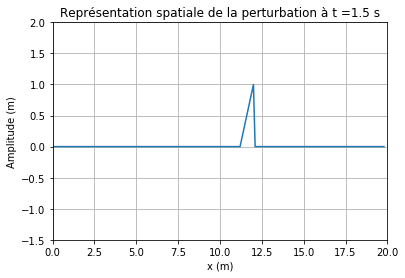

In [9]:
fig, ax = pyplot.subplots(1,1)
ax.grid(True)
ax.axis([0,L, -1.5, 2])
ax.set_xlabel('x (m)')
ax.set_ylabel('Amplitude (m)')
ax.set_title("Représentation spatiale de la perturbation à t ="
        + format(mon_t,'.1f') + " s")
ax.plot(list_x, list_a)

Je vous laisse méditer très profondément sur pourquoi la représentation spatiale ressemble à la représentation temporelle, mais à l'envers.

### Perturbation sinusoïdale

Imaginons maintenant que la pertubation est sinusoïdale : un opérateur monte et descend la corde périodiquement (apparemment c'est même un sport qui se pratique avec de grosses cordes).
Ce mouvement est en fait beaucoup plus simple physiquement que la première perturbation (qui est en fait impossible à vraiment réaliser).
La fonction correspondante est la suivante :

In [10]:
def PerturbSinus(temps):
    # à la position (0,0)
    # temps en seconde
    # amplitude en mètre

    T = 0.5 # période en s
    amplitude = 1.*sin(temps*2*pi/T)
    
    if temps>0.15 and temps<=0.20:
        amplitude = 0.6

    return amplitude

La fonction $sinus(x)$ est utilisée avec la variable :
$x = temps \times {2\pi \over T}$

$x$ varie alors de $0$ à $2\pi$ quand le temps varie de $0$ à une période $T$.

Cette fonction produit donc bien une amplitude qui varie sinusoïdalement avec une période T.

La partie :

 if temps>0.15 and temps<=0.20:
        amplitude = 0.6

permet d'introduire un petite distorsion dans la corde pour mieux visualiser la propagation de l'onde. Observons le mouvement de l'extrémité de la corde en fonction du temps :

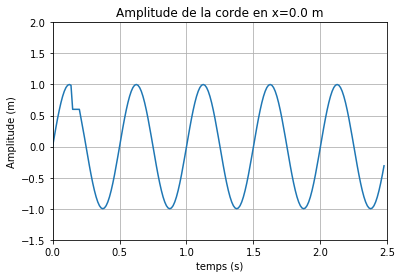

In [11]:
mon_x = 0 # à x m du point de départ de la perturbation
retard = mon_x/celerite

for i in range (0,Np-1):
    temps = i*dt
    list_a[i] = PerturbSinus(temps-retard)
    
fig, ax = pyplot.subplots(1,1)
ax.grid(True)
ax.axis([0,duree, -1.5, 2])
ax.set_xlabel('temps (s)')
ax.set_ylabel('Amplitude (m)')
ax.set_title("Amplitude de la corde en x="
        + format(mon_x,'.1f') + " m")
ax.plot(list_t, list_a)

Remplissons la liste des x avec la hauteur des points de la corde quand la perturbation est sinusoïdale, puis affichons la représentation spatiale correspondante.

In [12]:
mon_t = 0.5 # après t secondes

for i in range (0,Np-1):
    
    coord_x = L*i/Np
    retard = coord_x/celerite
    list_a[i] = PerturbSinus(mon_t - retard)

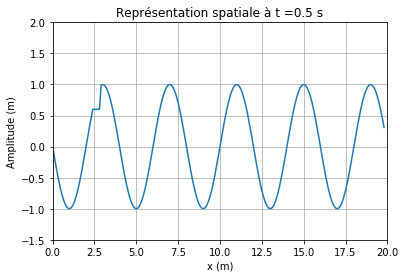

In [13]:
fig, ax = pyplot.subplots(1,1)
ax.grid(True)
ax.axis([0,L, -1.5, 2])
ax.set_xlabel('x (m)')
ax.set_ylabel('Amplitude (m)')
ax.set_title("Représentation spatiale à t ="
        + format(mon_t,'.1f') + " s")
ax.plot(list_x, list_a)

Comme exercice, vous pouvez changer la valeurs du temps et relancer les deux dernières parties de code. Vérifiez ainsi que cette onde se propage, notamment par le déplacement de la distorsion. Déterminez approximativement la valeur de la célérité grâce à vos essais.

In [1]:
x =3


In [2]:
print(x)

3
